# Recommender System
# Question A

Loading the students' ratings from the csv file TA_data.csv using pandas.read_csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
student_data = pd.read_csv("data_TAs.csv")
student_data

,Unnamed: 0,Harry Potter,Groundhog Day,Life of Brian,Indiana Jones,Lawrence of Arabia,Jurassic Park,Rushmore,Grease,The Godfather,...,Titanic,The English Patient,Avatar,Star Wars,Gone with the Wind,Casablanca,Jaws,Top Gun,Toy Story,Lord of the Rings
0,Maruf,3,2,3,3,3,3,3,3,4,...,2,2,3,4,2,2,3,3,4,4
1,Mauricio,2,3,4,3,2,3,4,3,3,...,1,1,3,3,2,1,3,3,4,3
2,Ricky,2,5,4,2,3,2,4,4,1,...,3,3,2,2,4,3,2,1,3,2
3,Simon,3,4,3,3,3,3,3,3,3,...,3,3,3,3,4,4,3,3,3,3
4,Ting,4,1,1,5,4,4,2,2,4,...,4,4,4,4,2,4,4,5,2,4
5,Mia,4,2,2,4,3,3,2,3,4,...,3,3,4,4,2,3,4,4,3,4
6,Marie,2,5,5,1,2,2,4,4,2,...,2,2,2,2,4,2,2,1,4,2
7,Gaoyue,3,4,3,3,3,3,3,3,2,...,4,4,3,2,4,4,3,2,2,2
8,Nick,4,1,2,4,3,4,2,2,4,...,3,3,4,4,2,2,4,4,4,4
9,Ramsey,3,4,3,3,3,3,3,3,2,...,4,4,3,2,4,4,3,3,2,2


## Question A
Below, the ratings matrix is being stored in the variable ```ratings```. 
1. Calculate the mean of the rows $u$ and subtract it from each row of the matrix.
2. Compute the SVD of the resulting matrix using ```np.linalg.svd``` and plot the singular values.

***Please look at the documentation of np.linalg.svd to understand its return values.***

In [2]:
ratings = np.array(student_data.values)
print(ratings)

[['Maruf' 3 2 3 3 3 3 3 3 4 3 4 4 3 4 3 2 2 3 4 2 2 3 3 4 4]
 ['Mauricio' 2 3 4 3 2 3 4 3 3 4 5 3 4 3 3 1 1 3 3 2 1 3 3 4 3]
 ['Ricky' 2 5 4 2 3 2 4 4 1 4 3 1 4 2 2 3 3 2 2 4 3 2 1 3 2]
 ['Simon' 3 4 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 4 4 3 3 3 3]
 ['Ting' 4 1 1 5 4 4 2 2 4 1 1 4 1 4 4 4 4 4 4 2 4 4 5 2 4]
 ['Mia' 4 2 2 4 3 3 2 3 4 2 2 4 2 4 4 3 3 4 4 2 3 4 4 3 4]
 ['Marie' 2 5 5 1 2 2 4 4 2 5 5 2 5 2 2 2 2 2 2 4 2 2 1 4 2]
 ['Gaoyue' 3 4 3 3 3 3 3 3 2 3 3 2 3 2 3 4 4 3 2 4 4 3 2 2 2]
 ['Nick' 4 1 2 4 3 4 2 2 4 2 3 5 3 4 4 3 3 4 4 2 2 4 4 4 4]
 ['Ramsey' 3 4 3 3 3 3 3 3 2 3 2 2 3 2 3 4 4 3 2 4 4 3 3 2 2]]


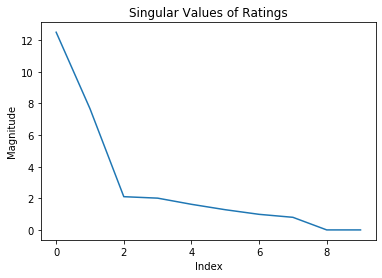

In [3]:
# YOUR WORK FOR QUESTION A HERE
r8s_no_name = ratings[:, 1:].T
means = [np.mean(i) for i in r8s_no_name]
r8s_no_name = np.array([r8s_no_name[i] - means[i] for i in range(r8s_no_name.shape[0])], dtype='float').T
ratings_U, ratings_S, ratings_V = np.linalg.svd(r8s_no_name)

plt.plot(ratings_S)
plt.title('Singular Values of Ratings')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

# Question B

- It seems like 3 singular values contribute most of the information in the data set. 
- Truncate the SVD to build a rank 3 model of the data. That is, find ```(U_truncated, S_truncated, VT_truncated)``` of dimensions ```((10, 3), (3, 3), (3, 25))``` respectively such that ```U_truncated.dot(S_truncated.dot(VT_truncated))``` is a good approximation to the data matrix. ***Hint.*** You might need ```np.linalg.diag``` on the singular values given the output of ```np.linalg.svd```. **Look at the documentation.**
- What is the percentage error between the true ratings and the low rank model? the percentage error is defined as:  ```np.linalg.norm(ratings - ratings_approx)/np.linalg.norm(ratings) * 100```


In [4]:
r = 3# rank of truncated SVD


U_truncated = ratings_U[:, :r]
S_truncated = np.diag(ratings_S[:r])
VT_truncated = ratings_V[:r]
ratings_approx = U_truncated.dot(S_truncated.dot(VT_truncated))


print(np.linalg.norm(r8s_no_name - ratings_approx) / np.linalg.norm(r8s_no_name) * 100)

20.775200005168827


We will now load the professor's ratings.

In [5]:
import json 
with open('data_arcak.json') as data_file:    
    ratings_arcak = json.load(data_file)
with open('data_sanders.json') as data_file:    
    ratings_sanders = json.load(data_file)

print("ratings_arcak =", ratings_arcak)
print("ratings_sanders =", ratings_sanders)

ratings_arcak = {'The Godfather': 3.498, 'Jaws': 3.0, 'Grease': 2.253, 'Toy Story': 3.249, '2001: A Space Odyssey': 3.0}
ratings_sanders = {'Rushmore': 3.747, 'Spinal Tap': 3.996, 'Groundhog Day': 3.0, 'Jaws': 2.751}


Since the professors have each only seen a small number of movies, we will need to estimate their preferences based on only those movies. Recall the we have abstracted our movie ratings in vector form. For example, Maruf's ratings in vectors form is, 

$$\begin{bmatrix} 
    \text{Harry Potter} \\ \text{Groundhog day} \\ \vdots \\ \text{Lord of the rings}
\end{bmatrix} = \begin{bmatrix} 
    3 \\ 2 \\ \vdots \\ 4
\end{bmatrix}$$

# Question C

1. Construct the vector representations of the Professors' ratings by setting the unknown movie ratings to the corresponding entries from the mean of the rows $u$. 
2. Subtract the mean $u$ from the resulting vector.

***Hint.*** Use ```list(student_data.columns).index()``` to determine the appropriate indexes.

In [6]:
# YOUR WORK FOR QUESTION C HERE
prof_arcak = np.array([
    ratings_arcak[i] - means[list(student_data.columns)[1:].index(i)]
    if i in ratings_arcak else 0
    for i in list(student_data.columns)[1:]
])
prof_sanders = np.array([
    ratings_sanders[i] - means[list(student_data.columns)[1:].index(i)]
    if i in ratings_sanders else 0
    for i in list(student_data.columns)[1:]
])

### Some notes.
- $V$ forms a basis for the rows of our ratings matrix and represents the "principal directions" of user reviews. 
- It is a model assumption that, if you like a certain group of movies, those movies will share similar characteristics. Sci-fi and action films, for example, have more in common than rom-coms usually, and we try and exploit that. 
- If we have two right singular vectors $v_1$ and $v_2$, $v_1$ could represent that principal "action" direction and $v_2$ could represent the principal "rom-com" direction. For example, dominantly action film will be something like $10 v_1 + 02 v_2$ and a dominantly rom-com film will have something like $0.1 v_1 + 5 v_2$. A movie that is a rom-com action film would be some weighted somewhat evenly, like $2 v_1 + 2 v_2$. 
- Since we have a way of defining the characteristics of a film in terms of the basis vectors in $V$, we can try to guess the remaining ratings for the Professors by projecting their ratings onto $V$. For example, if the projection onto $v_1$ is higher than $v_2$, it suggests that the person would like action films more that rom-coms. We will use this idea to guess the ratings. 

# Question D

We have $3$ principal components $(v_1, v_2, v_3)$ with ```VT_truncated``` being,
$$\begin{bmatrix} | & | & | \\ v_1 & v_2 & v_3\\ | & | & | \end{bmatrix}^T$$
Construct ```proj_arcak``` and ```proj_sanders``` by calculating the representations of ```prof_arcak``` and ```prof_sanders``` in terms of $(v_1, v_2, v_3)$. That is to say, if $x$ is ```prof_arcak```,
$$\text{prof_arcak} = \langle x , v_1 \rangle v_1 +  \langle x , v_2 \rangle v_2 +  \langle x , v_3 \rangle v_3$$
***Hint.*** Remember orthonormal projections.

In [7]:
# YOUR WORK FOR QUESTION D HERE
proj_arcak = VT_truncated.T.dot(VT_truncated).dot(prof_arcak)
proj_sanders = VT_truncated.T.dot(VT_truncated).dot(prof_sanders)
print(VT_truncated)

[[-0.18228518  0.34391486  0.26545868 -0.25400537 -0.09462681 -0.14449774
   0.18228518  0.14449774 -0.22804529  0.26545868  0.20084336 -0.26074136
   0.2367851  -0.19539462 -0.17083186 -0.08151736 -0.08151736 -0.17083186
  -0.19539462  0.18796381 -0.04882129 -0.17083186 -0.29647441  0.04139048
  -0.19539462]
 [ 0.0647582   0.18087275 -0.12487421  0.05602693  0.12896329  0.00067537
  -0.0647582  -0.00067537 -0.18713203 -0.12487421 -0.35987099 -0.24098876
  -0.15795839 -0.16077557 -0.00408908  0.35449706  0.35449706 -0.00408908
  -0.16077557  0.25039539  0.40835379 -0.00408908 -0.02030716 -0.31873397
  -0.16077557]
 [ 0.13314062 -0.14488673  0.02862675  0.00224512 -0.19263924  0.28945152
  -0.13314062 -0.28945152 -0.11671772  0.02862675  0.24000325  0.3066541
   0.31432207 -0.28224129  0.16401249  0.22274267  0.22274267  0.16401249
  -0.28224129  0.11369292 -0.20062915  0.16401249 -0.00777084  0.03208077
  -0.28224129]]


# Question E

We're almost there! We now simply need to account for the mean $u$. Define ```pred_arcak``` and ```pred_sanders``` as,
$$\text{pred_arcak} = \text{proj_arcak} + u \text{ and } \text{pred_sanders} = \text{proj_sanders} + u$$
This effectively adds the bias back. 

In [8]:
# YOUR WORK FOR PART E HERE
pred_arcak = proj_arcak + means
pred_sanders = proj_sanders + means
print(pred_sanders)

[2.89498101 3.22865043 3.13342797 2.98097909 2.85718396 2.90543666
 3.10501899 3.09456334 2.8516148  3.13342797 3.22639326 2.79975855
 3.19500315 2.97934434 3.00938807 2.77282063 2.77282063 3.00938807
 2.97934434 3.01968004 2.82467688 3.00938807 2.77849323 3.17434749
 2.97934434]


# Question F

Find the movie corresponding the largest entry of ```pred_arcak``` and ```pred_sanders```. This is your first guess at a movie recommendation! 

In [9]:
# YOUR WORK FOR QUESTION F HERE
print(list(student_data.columns)[1:][np.argmax(pred_arcak)])
print(list(student_data.columns)[1:][np.argmax(pred_sanders)])

Spiderman
Groundhog Day


# Question G
Professor Sanders has already seen his recommendation. What's the next best movie you can recommend?

In [10]:
# YOUR WORK FOR QUESTION G HERE
pred_sanders[np.argmax(pred_sanders)] = 0
print(list(student_data.columns)[1:][np.argmax(pred_sanders)])

Freddy Got Fingered
